# Processo de Análise de Dados

## **1 - Definição do Problema**
## **2 - Carregando os Dados**
## **3 - Ánalise Exploratória**
## **4 – Criação dos gráficos**
## **5 – Apresentação dos Resultados**



# Definição do Problema

- **Demonstre uma análise de correlação entre as variáveis.**
- **Qual o ano com maior número de fatalidades?**
- **Quais são as 10 principais ocorrências por UF?**
- **Quais são as 10 principais ocorrências por cidades?**
- **Qual tipo de ocorrência com mais registros?** 
- **Quais os anos com maior número de ocorrências e menor?**

## **Sobre estes dados**

Pessoal, este conjunto de dados é sobre acidentes aéreos no espaço aéreo brasileiro. O órgão responsável por investigar, relacionar, fazer prevenções e publicar relatórios sobre acidentes aéreos é o CENIPA (Centro de Investigação e Prevenção de Acidentes Aeronáuticos). O CENIPA investiga todos os acidentes aéreos no Brasil, desde o gravador de voo até os destroços das aeronaves.

Acompanhe o site com conjunto de dados e relatórios:
conjuntos de dados: http://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira
Relatórios: http://sistema.cenipa.aer.mil.br/cenipa/paginas/relatorios/relatorios.php

Site do Cenipa:
https://www2.fab.mil.br/cenipa/index.php/o-cenipa



## **O que você pode fazer com esses dados**
Você pode usar esses dados para descobrir quais estados e suas respectivas cidades possuem maior número de acidentes aéreos.


# Preparação e Exploração de Dados

## Indentificação das Variáveis


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random as random
import locale

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
#Carregando Dataset
df = pd.read_csv('C:/ProjetosNovos/AcidentesAere/dados.csv')


In [ ]:
#Dimensão do dataset
print("Dimensão:", df.shape)

Dimensão: (5116, 116)


In [ ]:
#Visualizando o dataset
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
df.head( )

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,...,fator_74,fator_75,fator_76,fator_77,fator_78,fator_79,fator_80,fator_81,fator_82,fator_83,fator_84,fator_85,fator_86,fator_87,dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,BRASIL,SJOG,PUAUN,ULTRALEVE,ORION LTDA,F1A EAGLE,PISTÃO,1.0,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,BRASIL,SSKW,PRAXL,AVIÃO,EMBRAER,ERJ 190-200 IGW,JATO,2.0,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
2,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,2013-11-25,12:32:00,CACOAL,RO,BRASIL,SSKW,PTRDP,AVIÃO,EMBRAER,EMB-810C,PISTÃO,2.0,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
3,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,2016-05-13,19:19:00,CACOAL,RO,BRASIL,SSKW,PTYEL,HELICÓPTERO,BELL HELICOPTER,206L-4,TURBOEIXO,1.0,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
4,201103187273112,INCIDENTE,OUTROS,2011-03-18,13:30:00,CEREJEIRAS,RO,BRASIL,****,PTUQW,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,PISTÃO,1.0,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06


In [ ]:
#Visualizando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Columns: 116 entries, codigo_ocorrencia to dia_extracao
dtypes: float64(4), int64(3), object(109)
memory usage: 4.5+ MB


In [ ]:
df.describe()

,codigo_ocorrencia,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,quantidade_fatalidades,quantidade_fatores_contribuintes
count,5.116000e+03,5087.000000,5116.000000,5040.000000,5053.00000,385.000000,5116.000000
mean,2.012660e+14,1.493218,16271.238663,29.179563,1928.06887,2.161039,0.799257
std,2.816985e+11,0.560096,37630.153351,57.098002,350.12826,2.076666,2.180642
min,2.008010e+14,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,2.010101e+14,1.000000,1202.000000,2.000000,1979.00000,1.000000,0.000000
50%,2.013012e+14,1.000000,2073.000000,6.000000,1992.00000,2.000000,0.000000
75%,2.015041e+14,2.000000,6800.000000,11.000000,2006.00000,2.000000,0.000000
max,2.018050e+14,4.000000,380790.000000,659.000000,2017.00000,24.000000,22.000000


## Análise Exploratória

In [ ]:
#Verificando as colunas.

In [ ]:
df.columns

Index(['codigo_ocorrencia', 'ocorrencia_classificacao', 'ocorrencia_tipo',
       'ocorrencia_dia', 'ocorrencia_horario', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'aeronave_matricula',
       ...
       'fator_79', 'fator_80', 'fator_81', 'fator_82', 'fator_83', 'fator_84',
       'fator_85', 'fator_86', 'fator_87', 'dia_extracao'],
      dtype='object', length=116)

In [ ]:
#Removendo colunas que não serão usadas

In [ ]:
df = df.drop(["aeronave_modelo",	"aeronave_tipo_motor",	"codigo_ocorrencia", "ocorrencia_pais",	"ocorrencia_aerodromo",	"aeronave_matricula",  "quantidade_fatores_contribuintes","fator_1","fator_2","fator_3","fator_4","fator_5","fator_6","fator_7","fator_8","fator_9","fator_10","fator_11","fator_12","fator_13","fator_14","fator_15","fator_16","fator_17","fator_18","fator_19","fator_20","fator_21","fator_22","fator_23","fator_24","fator_25","fator_26","fator_27","fator_28","fator_29","fator_30","fator_31","fator_32","fator_33","fator_34","fator_35","fator_36","fator_37","fator_38","fator_39","fator_40","fator_41","fator_42","fator_43","fator_44","fator_45","fator_46","fator_47","fator_48","fator_49","fator_50","fator_51","fator_52","fator_53","fator_54","fator_55","fator_56","fator_57","fator_58","fator_59","fator_60","fator_61","fator_62","fator_63","fator_64","fator_65","fator_66","fator_67","fator_68","fator_69","fator_70","fator_71","fator_72","fator_73","fator_74","fator_75","fator_76","fator_77","fator_78","fator_79","fator_80","fator_81","fator_82","fator_83","fator_84","fator_85","fator_86","fator_87","dia_extracao"], axis= 1)

In [ ]:
#Verificando os tipos de dados.

In [ ]:
df.dtypes

ocorrencia_classificacao           object
ocorrencia_tipo                    object
ocorrencia_dia                     object
ocorrencia_horario                 object
ocorrencia_cidade                  object
ocorrencia_uf                      object
aeronave_equipamento               object
aeronave_fabricante                object
aeronave_quantidade_motores       float64
aeronave_peso_maximo_decolagem      int64
aeronave_quantidade_assentos      float64
aeronave_ano_fabricacao           float64
aeronave_pais_registro             object
aeronave_categoria_registro        object
aeronave_segmento_aviacao          object
aeronave_origem_voo                object
aeronave_destino_voo               object
aeronave_fase_voo                  object
aeronave_tipo_operacao             object
aeronave_nivel_dano                object
quantidade_fatalidades            float64
dtype: object

In [ ]:
#Verificando os dados nulos.

In [ ]:
(df.isnull().sum())

ocorrencia_classificacao             0
ocorrencia_tipo                      0
ocorrencia_dia                       0
ocorrencia_horario                   0
ocorrencia_cidade                    0
ocorrencia_uf                        0
aeronave_equipamento                 0
aeronave_fabricante                  0
aeronave_quantidade_motores         29
aeronave_peso_maximo_decolagem       0
aeronave_quantidade_assentos        76
aeronave_ano_fabricacao             63
aeronave_pais_registro               0
aeronave_categoria_registro          0
aeronave_segmento_aviacao            0
aeronave_origem_voo                  0
aeronave_destino_voo                 0
aeronave_fase_voo                    0
aeronave_tipo_operacao               0
aeronave_nivel_dano                  0
quantidade_fatalidades            4731
dtype: int64

In [ ]:
#Removendo dados nulos

In [ ]:
df.dropna(inplace=True)

In [ ]:
#Verificando dados nulos

In [ ]:
(df.isnull().sum())

ocorrencia_classificacao          0
ocorrencia_tipo                   0
ocorrencia_dia                    0
ocorrencia_horario                0
ocorrencia_cidade                 0
ocorrencia_uf                     0
aeronave_equipamento              0
aeronave_fabricante               0
aeronave_quantidade_motores       0
aeronave_peso_maximo_decolagem    0
aeronave_quantidade_assentos      0
aeronave_ano_fabricacao           0
aeronave_pais_registro            0
aeronave_categoria_registro       0
aeronave_segmento_aviacao         0
aeronave_origem_voo               0
aeronave_destino_voo              0
aeronave_fase_voo                 0
aeronave_tipo_operacao            0
aeronave_nivel_dano               0
quantidade_fatalidades            0
dtype: int64

In [ ]:
#Convertendo data para datetime

In [ ]:
df['ocorrencia_dia'] =  pd.to_datetime(df['ocorrencia_dia'], format='%Y/%m/%d')

In [ ]:
#Extraindo ano de 'ocorrencia_dia'

In [ ]:
df['Ano'] = df['ocorrencia_dia'].dt.year

In [ ]:
#Extraindo mês de 'ocorrencia_dia'

In [ ]:
df['Mês'] = df['ocorrencia_dia'].dt.month_name(locale='pt_BR.UTF-8')

In [ ]:
df['Dia'] = df['ocorrencia_dia'].dt.day_name(locale='pt_BR.UTF-8')

In [ ]:
df.head()

,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,aeronave_equipamento,aeronave_fabricante,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,Ano,Mês,Dia
11,ACIDENTE,PERDA DE CONTROLE EM VOO,2009-12-28,17:30:00,ACEGUÁ,RS,AVIÃO,CESSNA AIRCRAFT,1.0,1812,1.0,1973.0,BRASIL,SAE,ESPECIALIZADA,****,****,DECOLAGEM,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,1.0,2009,Dezembro,Segunda-feira
14,ACIDENTE,PERDA DE CONTROLE EM VOO,2011-04-06,20:25:00,ALTO ALEGRE,RR,HELICÓPTERO,HELIBRAS,2.0,2540,6.0,1988.0,BRASIL,TPX,TÁXI AÉREO,SWUQ,SBBV,DESCIDA,TÁXI AÉREO,DESTRUÍDA,3.0,2011,Abril,Quarta-feira
15,ACIDENTE,INDETERMINADO,2010-06-09,13:00:00,ALTO ALEGRE,RR,AVIÃO,CESSNA AIRCRAFT,1.0,1202,4.0,0.0,BRASIL,TPP,PARTICULAR,****,****,INDETERMINADA,VOO PRIVADO,DESTRUÍDA,1.0,2010,Junho,Quarta-feira
18,ACIDENTE,FALHA DO MOTOR EM VOO,2011-11-22,16:40:00,ALTO ALEGRE,RR,AVIÃO,CESSNA AIRCRAFT,1.0,1724,6.0,1973.0,BRASIL,TPX,TÁXI AÉREO,****,****,CRUZEIRO,TÁXI AÉREO,DESTRUÍDA,1.0,2011,Novembro,Terça-feira
34,ACIDENTE,INCURSÃO EM PISTA,2009-06-12,14:50:00,ANGRA DOS REIS,RJ,HELICÓPTERO,EUROCOPTER FRANCE,1.0,2250,7.0,2005.0,BRASIL,TPP,PARTICULAR,SDRJ,SIIL,ESTACIONAMENTO,VOO PRIVADO,NENHUM,1.0,2009,Junho,Sexta-feira


In [ ]:
#Reorganizando as colunas 

In [ ]:
df = df.reindex(['ocorrencia_classificacao', 'ocorrencia_tipo', 'Ano', 'Mês', 'Dia', 'ocorrencia_dia', 'ocorrencia_horario', 'ocorrencia_cidade',	'ocorrencia_uf', 'aeronave_equipamento', 'aeronave_fabricante',	'aeronave_quantidade_motores',	'aeronave_peso_maximo_decolagem',	'aeronave_quantidade_assentos',	'aeronave_ano_fabricacao',	'aeronave_segmento_aviacao', 'aeronave_tipo_operacao',	'aeronave_nivel_dano',	'quantidade_fatalidades'], axis=1)

In [ ]:
df.head()

,ocorrencia_classificacao,ocorrencia_tipo,Ano,Mês,Dia,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,aeronave_equipamento,aeronave_fabricante,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_segmento_aviacao,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades
11,ACIDENTE,PERDA DE CONTROLE EM VOO,2009,Dezembro,Segunda-feira,2009-12-28,17:30:00,ACEGUÁ,RS,AVIÃO,CESSNA AIRCRAFT,1.0,1812,1.0,1973.0,ESPECIALIZADA,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,1.0
14,ACIDENTE,PERDA DE CONTROLE EM VOO,2011,Abril,Quarta-feira,2011-04-06,20:25:00,ALTO ALEGRE,RR,HELICÓPTERO,HELIBRAS,2.0,2540,6.0,1988.0,TÁXI AÉREO,TÁXI AÉREO,DESTRUÍDA,3.0
15,ACIDENTE,INDETERMINADO,2010,Junho,Quarta-feira,2010-06-09,13:00:00,ALTO ALEGRE,RR,AVIÃO,CESSNA AIRCRAFT,1.0,1202,4.0,0.0,PARTICULAR,VOO PRIVADO,DESTRUÍDA,1.0
18,ACIDENTE,FALHA DO MOTOR EM VOO,2011,Novembro,Terça-feira,2011-11-22,16:40:00,ALTO ALEGRE,RR,AVIÃO,CESSNA AIRCRAFT,1.0,1724,6.0,1973.0,TÁXI AÉREO,TÁXI AÉREO,DESTRUÍDA,1.0
34,ACIDENTE,INCURSÃO EM PISTA,2009,Junho,Sexta-feira,2009-06-12,14:50:00,ANGRA DOS REIS,RJ,HELICÓPTERO,EUROCOPTER FRANCE,1.0,2250,7.0,2005.0,PARTICULAR,VOO PRIVADO,NENHUM,1.0


In [ ]:
#1 - Correlação das variáveis

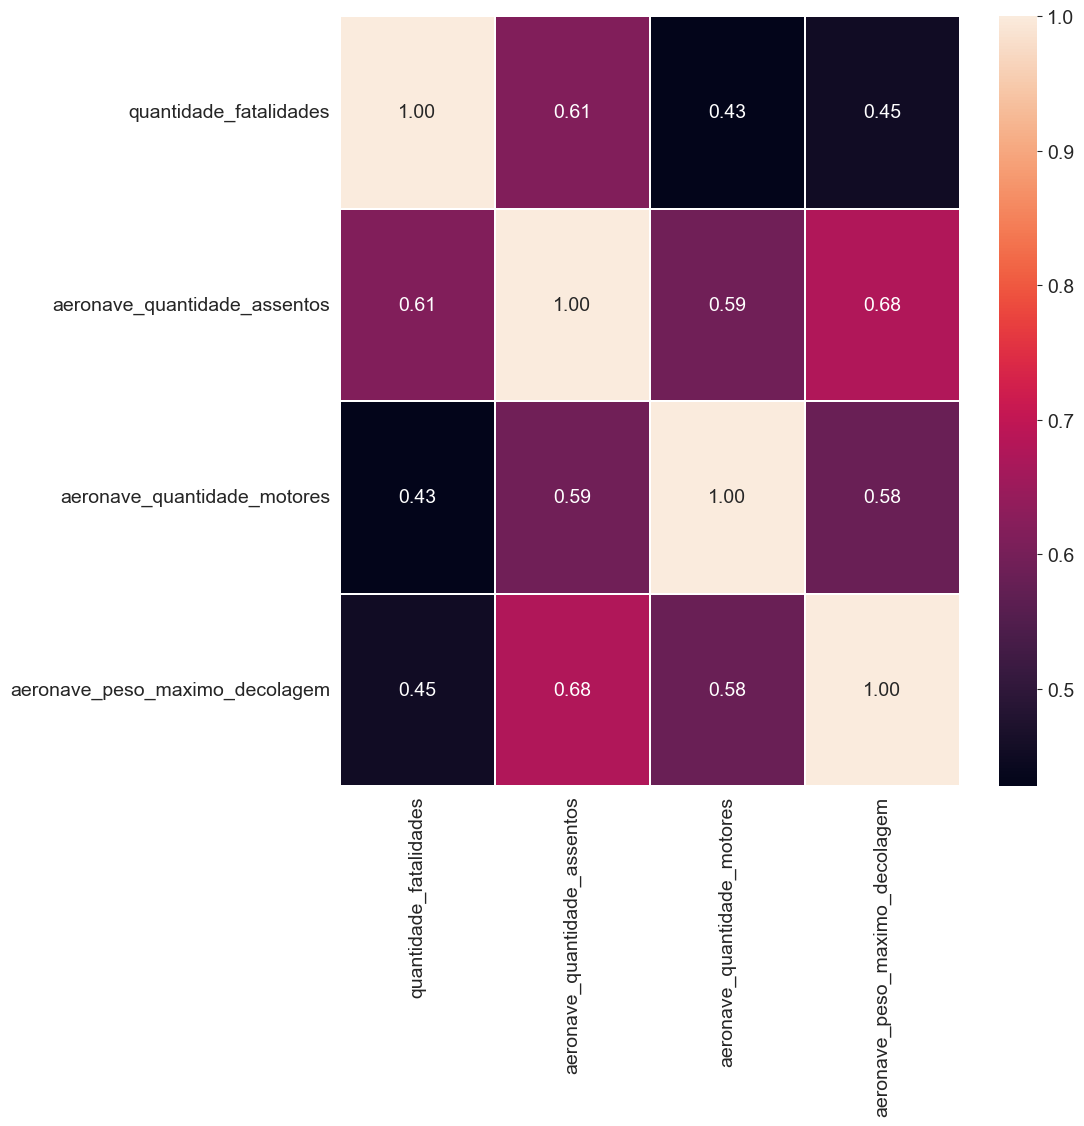

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df[['quantidade_fatalidades', 'aeronave_quantidade_assentos', 'aeronave_quantidade_motores', 'aeronave_peso_maximo_decolagem']].corr(), annot=True, linewidths=.1, fmt=".2f", ax=ax)
plt.show()

In [ ]:
# Fatalidades de 2008 à 2018

In [ ]:
cidades = ['RIO DE JANEIRO', 'SÃO PAULO', 'BELO HORIZONTE', 'MANAUS', 'LONDRINA']
anos = sorted(list(set(df['Ano'])))
not_null = df.dropna()
dic_anos = {i: [int(not_null.loc[not_null['Ano'] == ano, 
                             ['quantidade_fatalidades']].loc[not_null['ocorrencia_cidade'] == i, 
                                                             ['quantidade_fatalidades']].sum()) for ano in anos] for i in cidades}
dic_anos['Ano'] = anos 
df_anos = pd.DataFrame(dic_anos)
df_anos

,RIO DE JANEIRO,SÃO PAULO,BELO HORIZONTE,MANAUS,LONDRINA,Ano
0,4,0,4,1,0,2008
1,0,0,0,0,0,2009
2,6,1,2,6,0,2010
3,3,0,0,7,3,2011
4,4,3,0,1,2,2012
5,0,1,0,6,0,2013
6,2,0,0,0,0,2014
7,0,0,3,0,0,2015
8,4,7,0,6,14,2016
9,0,0,0,0,0,2017


In [ ]:
#Fatalidades por ano

In [ ]:
df_anos = pd.DataFrame({'Ano': anos, 'Mortes': [int(not_null.loc[not_null['Ano'] == ano, 
                                                                      ['quantidade_fatalidades']].sum()) for ano in anos]})
df_anos

,Ano,Mortes
0,2008,58
1,2009,63
2,2010,55
3,2011,110
4,2012,110
5,2013,94
6,2014,80
7,2015,70
8,2016,94
9,2017,52


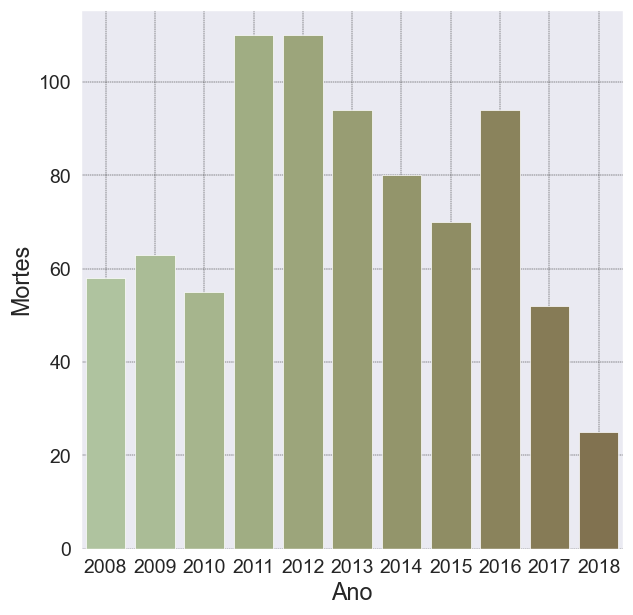

In [ ]:
plt.figure(figsize=(7, 7))
pallete = sns.cubehelix_palette(15, 4, 0.4, 0.60, 0.8, 0.6)
df_mortes = sns.barplot(data = df_anos,
                           x = 'Ano',
                           y = 'Mortes',
                           errorbar=('ci', False),
                           palette=pallete,
                           )
plt.grid(color = 'black', linestyle = '--', linewidth = 0.3),
plt.show()

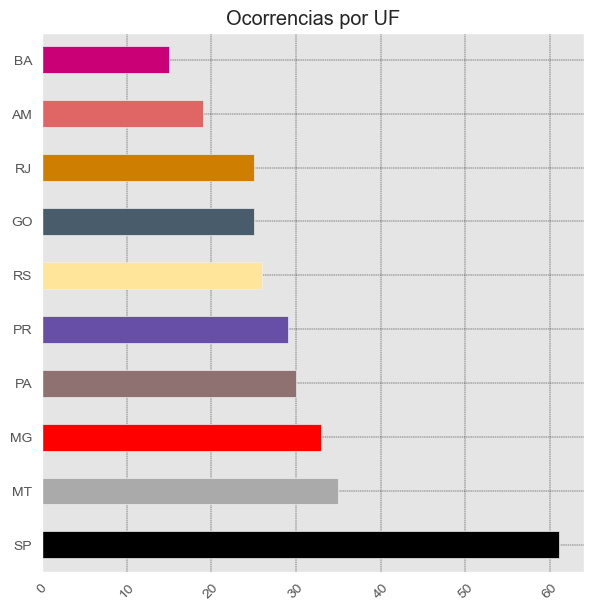

In [ ]:
#2 - Visualizando melhor em um gráfico os 10 principais tipos de ocorrência
plt.style.use("ggplot")
a = df['ocorrencia_uf'].value_counts()
a.head(10).plot(kind='barh', subplots=True, label="Ocorrencias por UF",figsize=(7, 7), color = ['#000000','#AAAAAA','#FF0000', '#8f7171', '#674ea7', '#ffe599', '#495c6b', '#ce7e00', '#e06666', '#c90076']),
plt.grid(color = 'black', linestyle = '--', linewidth = 0.3),
plt.xticks(rotation=45)
plt.show()
# Como podemos ver, falha do motor em voo é a principal ocorrência notifica.

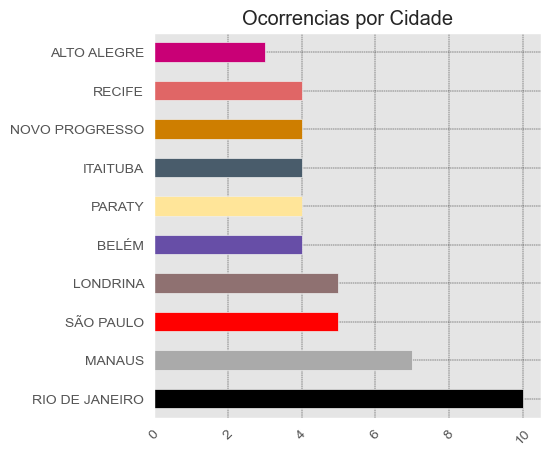

In [ ]:
#3 - Visualizando melhor em um gráfico os 10 principais tipos de ocorrência
plt.style.use("ggplot")
a = df['ocorrencia_cidade'].value_counts()
a.head(10).plot(kind='barh', subplots=True, label="Ocorrencias por Cidade",figsize=(5, 5), color = ['#000000','#AAAAAA','#FF0000', '#8f7171', '#674ea7', '#ffe599', '#495c6b', '#ce7e00', '#e06666', '#c90076']),
plt.grid(color = 'black', linestyle = '--', linewidth = 0.3),
plt.xticks(rotation=45)
plt.show()

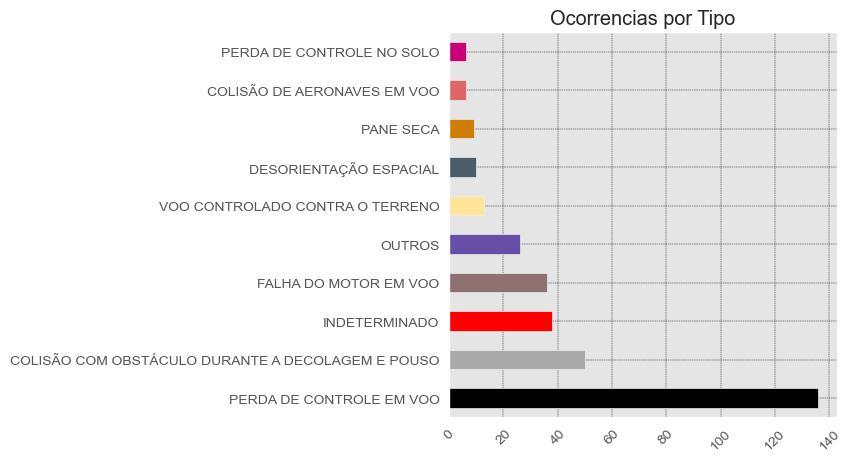

In [ ]:
#4 - Visualizando melhor em um gráfico os 10 principais tipos de ocorrência
plt.style.use("ggplot")
a = df['ocorrencia_tipo'].value_counts()
a.head(10).plot(kind='barh', subplots=True, label="Ocorrencias por Tipo",figsize=(5, 5), color = ['#000000','#AAAAAA','#FF0000', '#8f7171', '#674ea7', '#ffe599', '#495c6b', '#ce7e00', '#e06666', '#c90076']),
plt.grid(color = 'black', linestyle = '--', linewidth = 0.3),
plt.xticks(rotation=45)
plt.show()

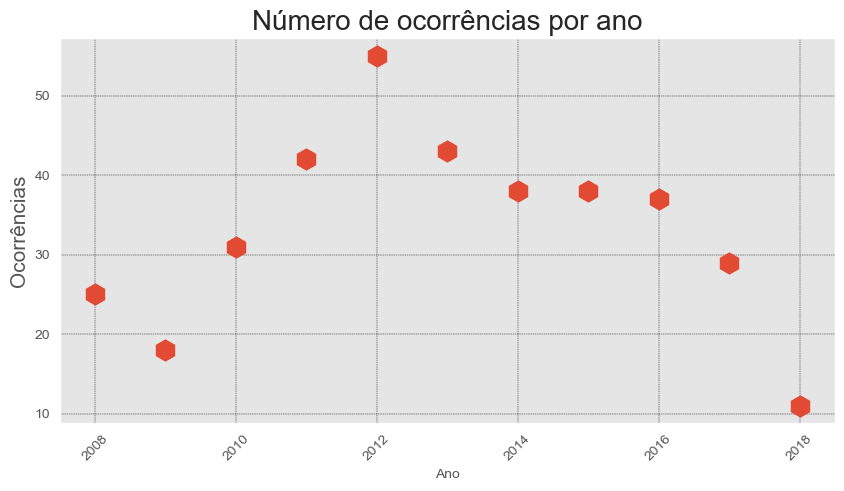

In [ ]:
#5 - Número de ocorrências por ano
quantidade_pop_estudo = df['Ano'].value_counts()

plt.figure(figsize=(10,5))
plt.plot(quantidade_pop_estudo, linestyle= 'none', markersize=15, marker='h')
plt.title('Número de ocorrências por ano', fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Ano', fontsize=10)
plt.ylabel('Ocorrências', fontsize=15)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.3),
plt.margins(.05)
plt.show()

# Apresentação dos Resultados


1 - Demonstre uma análise de correlação entre as variáveis.
Observa-se que a quantidade de fatalidades está mais relacionada com o número de assentos e depois com o número de motores e peso na decolagem.

2 - Qual o ano com maior número de fatalidades?
Observa-se que os anos de 2012 e 2013 são os anos com maior número de fatalidades.

3 - Quais são as 10 principais ocorrências por UF?
Observa-se que as UF´s com maior número de ocorrências são: SP>MT>MG>PA>PR>RS>GO>RJ> AM > BA

4 - Quais são as 10 principais ocorrências por cidades?
Observa-se que as cidades com maior número de ocorrências são: RJ>MANAUS>SP>LONDRINA>BELÉM>PARATY>ITAITUBA>NOVO PROGRESSO> RECIFE > ALTO ALEGRE.

5 - Qual tipo de ocorrência com mais registros?
Observa-se que a perda de controle em voo é o tipo de ocorrência com maior número de registros.

6 - Quais os anos com maior número de ocorrências e menor?
Observa-se que o ano de 2012 tivemos um pico de ocorrências totalizando 50, já o ano de 2018 foi o ano com menor número de ocorrências, totalizando 10.